# Background

In this notebook we generate surrogate data to test the information measures on. The data is generated in the spectral domain and the amount of information is changed by changing the kernel that determines the correlations as a function of intersource distance.


# Code

In [11]:
%pylab inline
import os, sys, pickle, logging
from importlib import reload

Populating the interactive namespace from numpy and matplotlib


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [12]:
from units import UNITS

## Fisher Plumes

In [145]:
import surrogate; reload(surrogate)
import fisher_plumes_tools as fpt;      reload(fpt)
import fisher_plumes_figs  as fpf;      reload(fpf);
import fisher_plumes_fig_tools as fpft; reload(fpft)
import fisher_plumes as fp; reload(fp)
FisherPlumes = fp.FisherPlumes

INFO:surrogate:Surrogate simulation data available for: ['no_info', 'one_info', 'two_info', 'high', 'spike_and_slab', 'blue', 'red', 'all_equal']


In [146]:
n_bootstraps = 50
pairs_mode = "unsigned"
Fsu = FisherPlumes("surr_high",
                   freq_max     = 100 * UNITS.hertz,
                   pitch        = 0.025 * UNITS.m,
                   which_coords = [(1.0, 0.)]*UNITS.m,
                   n_sources    = 16,
                   pairs_mode   = pairs_mode, n_bootstraps = n_bootstraps, random_seed = 1)    

           fisher_plumes 2023/05/16 11:56:15     INFO: ****** LOADING sim_name='surr_high' ******


           fisher_plumes 2023/05/16 11:56:15     INFO: 1 surr_high_pitch = 0.025 m


           fisher_plumes 2023/05/16 11:56:15     INFO: 1 surr_high_pitch = 2.5 cm


           fisher_plumes 2023/05/16 11:56:15     INFO: 1 surr_high_pitch = 25.0 mm


           fisher_plumes 2023/05/16 11:56:15     INFO: 1 surr_high_pitch = 25000.0 µm


INFO:surrogate:load_sims called for name='high' with pitch_units=<Quantity(1, 'surr_high_pitch')>


     fisher_plumes_tools 2023/05/16 11:56:15     INFO: Using absolute py coordinates.


INFO:surrogate:
high <class 'surrogate.SurrogateSimulationData'>
1 surr_high_pitch = 0.025 m
x_lim: 10 surr_high_pitch to 10 surr_high_pitch
y_lim: 0 surr_high_pitch to 0 surr_high_pitch
x-y Dimensions: [<Quantity(0, 'surr_high_pitch')>, <Quantity(0, 'surr_high_pitch')>]
x-range: 10.000 surr_high_pitch, ... 10.000 surr_high_pitch (1 points)
y-range: 0.000 surr_high_pitch, ... 0.000 surr_high_pitch (1 points)
fs: 50 hertz
Sources:
  0: =     S0 @ (x = +0 micrometer, y = -56250 micrometer)
  1: =     S1 @ (x = +0 micrometer, y = -48750 micrometer)
  2: =     S2 @ (x = +0 micrometer, y = -41250 micrometer)
  3: =     S3 @ (x = +0 micrometer, y = -33750 micrometer)
  4: =     S4 @ (x = +0 micrometer, y = -26250 micrometer)
  5: =     S5 @ (x = +0 micrometer, y = -18750 micrometer)
  6: =     S6 @ (x = +0 micrometer, y = -11250 micrometer)
  7: =     S7 @ (x = +0 micrometer, y = -3750 micrometer)
  8: =     S8 @ (x = +0 micrometer, y = +3750 micrometer)
  9: =     S9 @ (x = +0 micrometer, y

INFO:surrogate:Mapped coordinate (1.000 meter, 0.000 meter) to (10.000 surr_high_pitch, 0.000 surr_high_pitch), index (0, 0), name '@origin'.


INFO:surrogate:Generating surogate data where high frequencies are more informative.


INFO:surrogate:Field S0 has shape (3001, 1).


INFO:surrogate:Field S1 has shape (3001, 1).


INFO:surrogate:Field S2 has shape (3001, 1).


INFO:surrogate:Field S3 has shape (3001, 1).


INFO:surrogate:Field S4 has shape (3001, 1).


INFO:surrogate:Field S5 has shape (3001, 1).


INFO:surrogate:Field S6 has shape (3001, 1).


INFO:surrogate:Field S7 has shape (3001, 1).


INFO:surrogate:Field S8 has shape (3001, 1).


INFO:surrogate:Field S9 has shape (3001, 1).


INFO:surrogate:Field S10 has shape (3001, 1).


INFO:surrogate:Field S11 has shape (3001, 1).


INFO:surrogate:Field S12 has shape (3001, 1).


INFO:surrogate:Field S13 has shape (3001, 1).


INFO:surrogate:Field S14 has shape (3001, 1).


INFO:surrogate:Field S15 has shape (3001, 1).


INFO:surrogate:Generated surrogated data for 16 sources.


INFO:surrogate:t-range: 0.000 second, 0.020 second ... 60.000 second (3001 points)


     fisher_plumes_tools 2023/05/16 11:57:31     INFO: Computing pairs for len(yvals)=16 from -56250 to 56250 using pairs_mode='unsigned'.


     fisher_plumes_tools 2023/05/16 11:57:31     INFO: Removing duplicates in pairs dictionary.


           fisher_plumes 2023/05/16 11:57:31     INFO: list(self.sims.keys())=[-56250, -48750, -41250, -33750, -26250, -18750, -11250, -3750, 3750, 11250, 18750, 26250, 33750, 41250, 48750, 56250]


In [147]:
Fsu.compute_all_for_window(wnd = int(Fsu.fs * (1 * UNITS.sec)),
                         istart = 0,
                         window = 'boxcar',
                         tukey_param = 0,
                         dmax_um = np.inf,
                         fit_vars = False,
                         weighting_freq_max = 7 * UNITS.Hz,
)

           fisher_plumes 2023/05/16 11:58:48     INFO: Window set to self.wnd=50.


           fisher_plumes 2023/05/16 11:58:48     INFO: Computing trig coefficients for surr_high with istart=0 and tukey_param=0 and kwargs={'window': 'boxcar'}


           fisher_plumes 2023/05/16 11:58:48     INFO: Computing coefficients for 1 probes.


           fisher_plumes 2023/05/16 11:58:48     INFO: Computing variances for harmonics.


           fisher_plumes 2023/05/16 11:58:48     INFO: Computing correlations from trig coefficients.


           fisher_plumes 2023/05/16 11:58:49     INFO: Computing lambdas.


           fisher_plumes 2023/05/16 11:58:49    DEBUG: sum(freqs<=fmax)=26.


           fisher_plumes 2023/05/16 11:58:49    DEBUG: data.shape=(51, 2, 3808)


           fisher_plumes 2023/05/16 11:58:49    DEBUG: vars.shape=(2, 51)


           fisher_plumes 2023/05/16 11:58:51    DEBUG: utils.d1(self.la[0]).shape=(51, 26)


           fisher_plumes 2023/05/16 11:58:51     INFO: Computing p-values.


           fisher_plumes 2023/05/16 11:58:51     INFO: (Skipping p-value computation for bootstraps.)


           fisher_plumes 2023/05/16 11:58:52     INFO: Computing R^2-values.


           fisher_plumes 2023/05/16 11:58:52     INFO: (Skipping R^2-value computation for bootstraps.)


           fisher_plumes 2023/05/16 11:58:52     INFO: Computing generalized exponential fit to distance.


           fisher_plumes 2023/05/16 11:58:52     INFO: Using 16 distances <= inf um 


           fisher_plumes 2023/05/16 11:58:52     INFO: Computed λ for 26 frequencies and 16 distances and 51 bootstraps.


           fisher_plumes 2023/05/16 11:58:52     INFO: Not fitting amplitudes, instead using given values.


           fisher_plumes 2023/05/16 11:58:56    DEBUG: self.fit_params[0].shape=(51, 26, 3).


           fisher_plumes 2023/05/16 11:58:56    DEBUG: self.vars_for_freqs[0].shape=(51, 26).


           fisher_plumes 2023/05/16 11:58:56     INFO: Computing Fisher information (v2).


           fisher_plumes 2023/05/16 11:58:56     INFO: Evaluating at distances: [100, 200, 500, 1000, 2000, 5000, 7500, 15000, 22500, 30000, 37500, 45000, 52500, 60000, 67500, 75000, 82500, 90000, 97500, 105000, 112500].


           fisher_plumes 2023/05/16 11:58:56    DEBUG: self.I[0].shape=(51, 26, 21) has the expected value.


           fisher_plumes 2023/05/16 11:58:56     INFO: Done computing all for wnd=50.


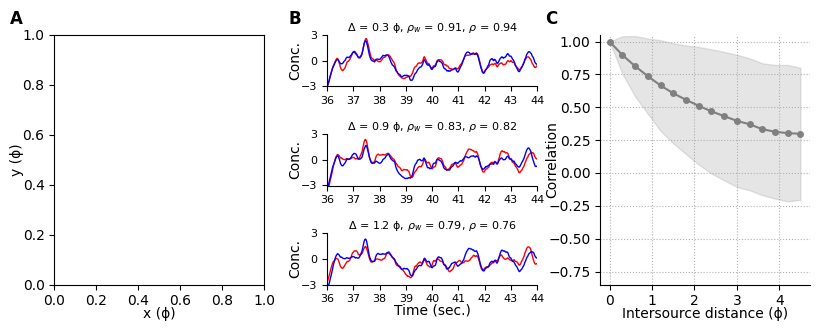

In [148]:
reload(fpf)
which_srcs   = [-3750,3750]
t_wnd        = [-4,4]*UNITS.sec
which_idists = [0,2,3]

ax_plume, ax_traces, ax_corr = fpf.plot_plumes_demo(Fsu, 40 * UNITS.sec, which_srcs, y_lim = (-3.01,3.01), y_ticks = [-3,0,3],
                                                    t_wnd = t_wnd, dt = 1 * UNITS.sec, which_idists=which_idists, data_dir=".")
#ax_corr.set_xticks(arange(5))
[ax_corr.set_ylim(-0.85,1.05), ax_corr.set_ylabel("Correlation",labelpad=-8)]
fpft.label_axes([ax_plume, ax_traces[0], ax_corr], "ABC", y = [0.99]*3, fontsize=12, fontweight="bold")


Mapped frequencies [ 1  2 19 20] Hz to indices [1, 2, 19, 20].


[(Text(0.5, 288.72222222222223, 'Intersource distance (ϕ)'), False, False),
 (Text(0.5, 288.72222222222223, 'Intersource distance (ϕ)'), False, False),
 (Text(0.5, 288.72222222222223, 'Intersource distance (ϕ)'), False, False),
 (Text(0.5, 36.72222222222221, 'Intersource distance (ϕ)'), False, False),
 (Text(0.5, 36.72222222222221, 'Intersource distance (ϕ)'), False, False),
 (Text(0.5, 36.72222222222221, 'Intersource distance (ϕ)'), False, False)]

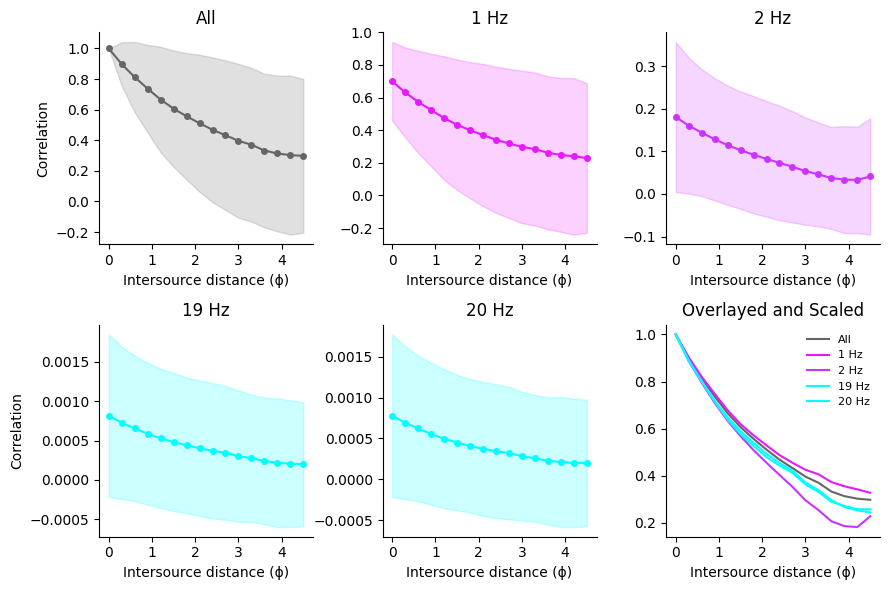

In [149]:
which_freqs = [1,2,19,20] * UNITS.hertz
labs = [f"{f}" for f in which_freqs]
cols = {"All":cm.gray(0.4)}; cols.update({l:col for l,col in zip(labs, [cm.cool(1 - f.magnitude/10) for f in which_freqs])})
slices = {"All":slice(1,10000)}
freq_inds = Fsu.freqs2inds(which_freqs)
print(f"Mapped frequencies {which_freqs} to indices {freq_inds}.")
slices.update({l:slice(fi, fi+1) for l, fi in zip(labs, freq_inds)})
ax = fpf.plot_correlations(Fsu.rho[iprb], Fsu.pitch.to("um").magnitude, slices=slices, cols=cols, n_rows = 2, plot_order = ["All"] + labs)
[(axi.set_xlabel(f"Intersource distance ({fpf.pitch_sym})"),
  False  and axi.set_xlim(xlims_[k]),
  False and axi.set_xticks(xticks_[k])) for axi in ax]    


      fisher_plumes_figs 2023/05/16 11:59:06     INFO: plot_gen_exp_paramter_fits_panel with which_fis=[1, 2, 19, 20], log_scale=True.


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/colors.py:710: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  xa = np.array(X, copy=True)


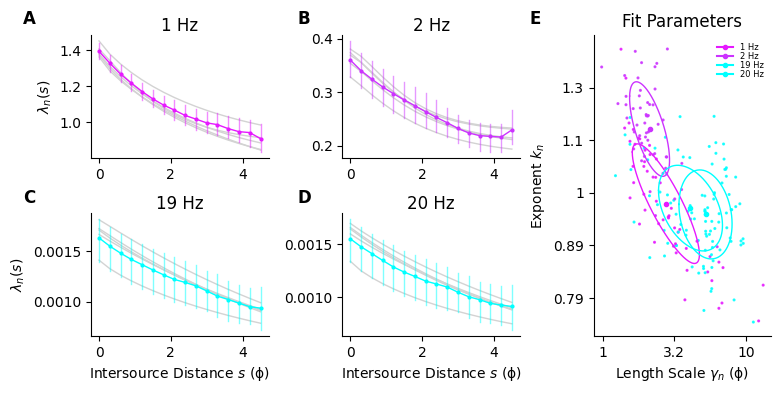

In [150]:
reload(fpft)
reload(fpf)
xl     = (-10,200)
freqs  = [1,2,19,20] * UNITS.hertz
xt     = {"su":arange(0,201,50),"bw":arange(0,201,50),          "cr": arange(0,101,25)}["su"]
xtp    = {"su":np.array([60,90,135]), "bw":np.array([60,90,135]),     "cr": np.array([40,60, 90, 135])}["su"]
ytp    = {"su":np.array([0.8,1,1.2,1.5]),"bw":np.array([0.8,1,1.2,1.5]), "cr": np.array([0.8,1,1.2,1.5,2])}["su"]
ax = fpf.plot_la_gen_fits_vs_distance(Fsu, 
                                      figsize=(8,4), legloc = 'right',
                                      log_scale = True,
                                      scatter_size=1.5,
                                      which_ifreqs = Fsu.freqs2inds(freqs))
[((i>1) and axi.set_xlabel(f"Intersource Distance $s$ ({fpf.pitch_sym})")) for i, axi in enumerate(ax[:4])]
tight_layout(h_pad=1,w_pad=0.5)
fpft.label_axes(ax, "ABCDEFGHIJK",
                align_y = [[0,1,4],[2,3]],
                align_x = [[0,2],[1,3]],
                fontsize=12, fontweight="bold", dy=-0.02)                        

      fisher_plumes_figs 2023/05/16 11:59:30     INFO: dd[0]=100, dd[-1]=125000 (0.004, 5 ϕ)


      fisher_plumes_figs 2023/05/16 11:59:30     INFO: Plotting which_ifreqs=[1, 2, 4, 14, 18, 20].


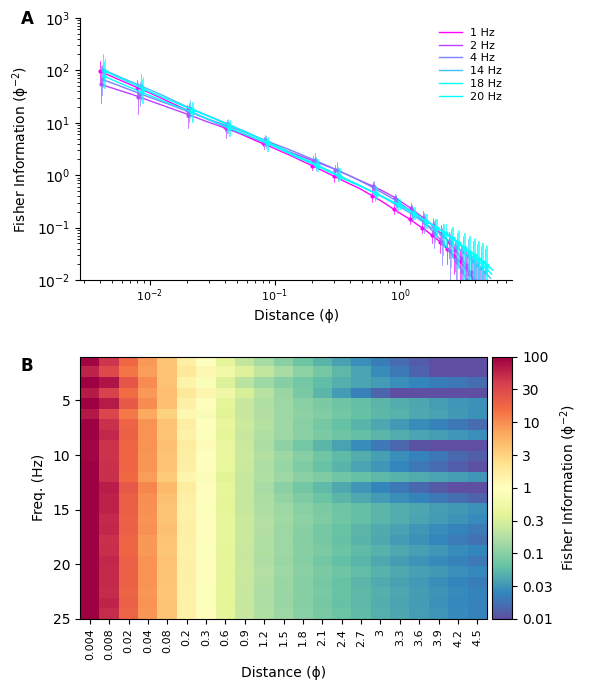

In [152]:
reload(fpt)
reload(fpft)
reload(fpf)
iprb      = 0
freqs     = [1,2, 4, 14,18, 20] * UNITS.hertz
freq_max  = 25 * UNITS.hertz
colscale  = 10
d_vals_um = [1,5,50]
d_lim_um  = [100, 125000]
bf_ytick  = [0,5,10]
bf_yl     = [0,15]
plot_param_fits = False
figure(figsize=(6,7))
ax_fisher, ax_best_freq, ax_d = fpf.plot_fisher_information(Fsu,
                                                            which_probe = iprb,
                                                            d_lim_um   = d_lim_um,
                                                            d_vals_um  = np.array(d_vals_um)*1000,
                                                            d_space_fun  = lambda d0,d1,n:np.logspace(log10(d0),log10(d1),n),
                                                            which_ifreqs = Fsu.freqs2inds(freqs),
                                                            x_stagger = lambda x, i: x*(1.02**i),
                                                            fi_scale  = 1, plot_fun = plt.loglog,
                                                            log_scale = True,
                                                            plot_param_fits = plot_param_fits,
                                                            freq_max  = freq_max,
                                                            colfun    = lambda f: cm.cool_r(f/colscale),
                                                            info_heatmap = True,
                                                            heatmap_range  = [-2,log10(100)],
                                                            heatmap_cm     = cm.Spectral_r,
)
ax_fisher.set_ylim(1e-2,1e3)
tight_layout(h_pad=2,w_pad=0)
fpft.label_axes([ax_fisher, ax_best_freq] + ax_d , "ABCDEFGHIJK",
                #align_y = [[2,3,4]],
                align_x = [[0,1,2] if plot_param_fits else [0,1]],
                fontsize=12, fontweight="bold", dy=-0.02)


## Kernel Sandbox

In [46]:
from scipy.signal import stft
from scipy.fft import fft

In [47]:
%pylab inline
import os, sys, pickle, logging
from importlib import reload
from units import UNITS
plt.style.use("default")


Populating the interactive namespace from numpy and matplotlib


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['fft']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Generating data

In [48]:
diag_norm = lambda K: K/diag(K)

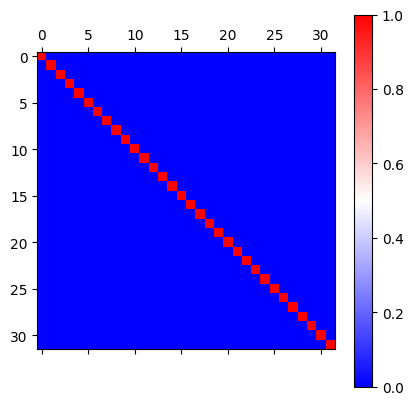

In [59]:
fs = 50
n_src      = 8
n_freq     = 1500
nt         = 2*n_freq+1
one_over_f = lambda f,k,fc: 1/(max(f/fc,1)**k)
ker_freq   = lambda i,j,n: one_over_f(n/nt*fs, k=4., fc = 1)
ker_spat   = lambda i,j,n: np.exp(-abs(i-j)/(12 - 4 * (n<n_freq//4)))
ker_spat   = lambda i,j,n: 1 if (i==j) else (0 if n not in [5, 10] else np.exp(-abs(i-j)/(12 - n)))
kernel_fun = lambda i,j,n: ker_spat(i,j,n) * ker_freq(i,j,n)            
K          = zeros((n_src*n_freq, n_src*n_freq))
for n in range(n_freq):
    for i in range(n_src):
        for j in range(n_src):
            K[n_src * n + i, n_src * n + j] = kernel_fun(i,j,n)

L = cholesky(K)


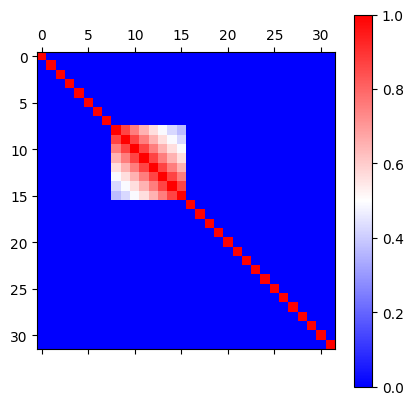

In [61]:
start = n_src*4
matshow(diag_norm(K[start:start+4*n_src][:,start:start+4*n_src]),cmap=cm.bwr); colorbar()

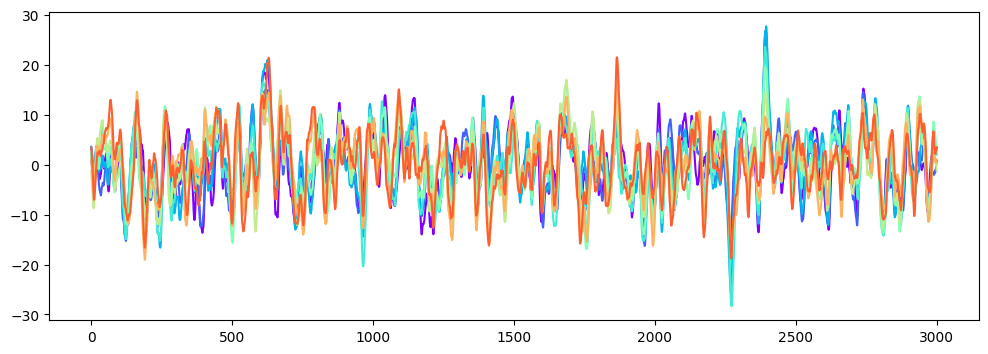

In [6]:
Xr, Xc = randn(2, n_src*n_freq) @ L.T

t = arange(0,2*n_freq+1)
f = 2*pi*arange(1,n_freq+1)/(2*n_freq)
C = cos(outer(t, f))
S = sin(outer(t, f))
c = (Xr + Xc)/2
s = (Xr - Xc)/2
x = []
for i in range(n_src):
    x.append(C @ c[i::n_src] + S @ s[i::n_src])
X = np.array(x)
figure(figsize=(12,4))
gca().set_prop_cycle(color=[cm.rainbow(i/n_src) for i in range(n_src)])
plot(t, X.T);

In [7]:
sf,tt,SX = stft(X, fs=fs, window='hann', nperseg=200,noverlap=100)

In [9]:
FX = fft.fft(X)
ff = arange(FX.shape[1])/FX.shape[1]*fs

<ipython-input-10-21d5c16e79ca>:3: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  xlim(0,25)


(0.011164722835612106, 25)

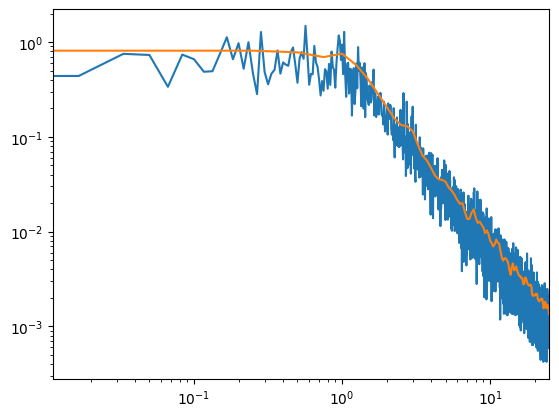

In [10]:
loglog(ff, mean(abs(FX).T,axis=1)/2000)
loglog(sf, mean(mean(abs(SX),axis=-1), axis=0)/2.5)
xlim(0,25)


In [76]:
mean(abs(SX),axis=1).shape

(8, 32)